In [1]:
from datetime import datetime
from IPython.display import display, HTML

current_date = datetime.now().strftime('%d-%m-%Y')
html_content = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center; flex-grow: 1;">{current_date}</div>
    <div><em>ESTADÍSTICA</em></div>
</div>
<hr>
"""

display(HTML(html_content))

# Ley de los grandes números

La _**ley de los grandes números**_ _(law of large numbers)_ establece que a medida que aumenta el número de intentos, los valores de la muestra tienden a converger en el resultado esperado. Las dos formas de esta ley sientan las bases tanto para la estadística como para la teoría de la probabilidad.

## Ley débil de los grandes números

Hay dos formas de la ley de los grandes números, pero las diferencias son principalmente teóricas. Las leyes débil y fuerte de los grandes números se aplican a una secuencia de valores para variables aleatorias independientes e idénticamente distribuidas (i.i.d.): $X_1, X_2,\dots,X_n$.

La ley débil de los grandes números establece que a medida que $n$ aumenta, el estadístico muestral de la secuencia converge en probabilidad al valor de la población. La ley débil de los grandes números también se conoce como _**ley de Khinchin**_.

Esto es lo que eso significa. Supongamos que especificamos una diferencia distinta de cero entre el valor teórico y el valor de la muestra. Por ejemplo, podemos definir una diferencia entre la probabilidad teórica de los resultados del lanzamiento de una moneda (0,50) y la proporción real que obtenemos en varios intentos. A medida que aumenta el número de ensayos, también aumenta la probabilidad de que la diferencia real sea menor que esta diferencia predefinida. Esta probabilidad converge en 1 cuando el tamaño de la muestra se aproxima al infinito.

Esta idea se aplica incluso cuando definimos pequeñas diferencias entre los valores reales y esperados, solo necesitamos una muestra más grande.

## Ley fuerte de los grandes números

La ley fuerte de los grandes números describe cómo una estadística muestral converge en el valor de la población a medida que aumenta el tamaño de la muestra o el número de intentos. Por ejemplo, la media de la muestra convergerá con la media de la población a medida que aumenta el tamaño de la muestra. La ley fuerte de los grandes números también se conoce como _**ley fuerte de Kolmogorov**_.

Ambas leyes se aplican a varias características, que van desde las medias de las variables continuas hasta las proporciones de los ensayos de Bernoulli.

A continuación, vamos a simular la ley de los grandes números usando dos ejemplos:

**Ejemplo de coeficiente intelectual**

Imaginemos que estamos estudiando puntuaciones de coeficiente intelectual. Estamos seleccionando aleatoriamente a 100 participantes y midiendo sus coeficientes intelectuales. A medida que reunimos sujetos, evaluaremos su coeficiente intelectual y luego volveremos a calcular la media de la muestra con cada persona adicional. Este proceso produce una secuencia de medias muestrales a medida que el tamaño muestral aumenta de 1 a 100. Si la ley de los grandes números se cumple, esperaríamos que las medias muestrales converjan en la media poblacional a medida que aumenta el tamaño muestral.

Para esta población, definiremos la distribución poblacional de las puntuaciones de CI siguiendo una distribución normal con una media de 100 y una desviación estándar de 15.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Hacemos el experimentos reproducible
np.random.seed(1)

# Generemos una población de 10.000 individuos que sigue
# una distribución normal con una media de 100 y una
# desviación stándar de 15
data_n = np.random.normal(loc=100, scale=15, size=10000)

# Generemos un Pandas Series con los resultados
data_CI = pd.Series(data_n, name='CI')

# Mostramos los 5 primeros
data_CI[0:5]

0    124.365180
1     90.823654
2     92.077424
3     83.905471
4    112.981114
Name: CI, dtype: float64

In [4]:
# Comprobamos la media
data_CI.mean()

100.14658985048656

In [5]:
# Comprobamos la desviación estándar
data_CI.std()

14.982536800889878

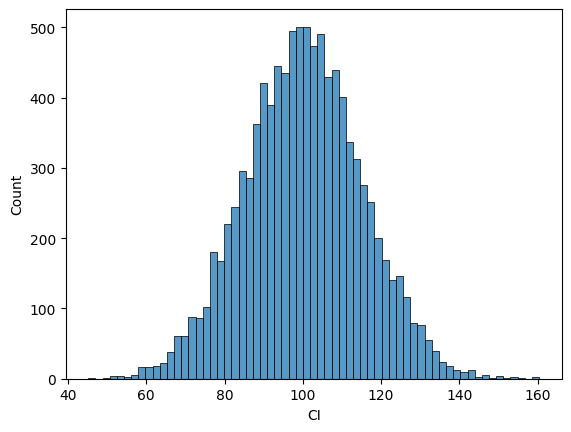

In [6]:
# Mostramos la distribución
sns.histplot(data_CI);

In [7]:
# Sacamos las 100 muestras aleatoriamente y calculamos sus medias
mean_dict = {}
for i in range(1, 101):
    mean_dict[i] = data_CI.sample(i, random_state=42).mean()

In [8]:
# Guardamos los datos en un DataFrame
data_mean = pd.DataFrame(list(mean_dict.items()), columns=['sample_size', 'sample_mean'])
data_mean

,sample_size,sample_mean
0,1,110.642750
1,2,106.377387
2,3,109.458789
3,4,112.812577
4,5,107.968167
...,...,...
95,96,99.844777
96,97,99.946594
97,98,99.965253
98,99,100.093917


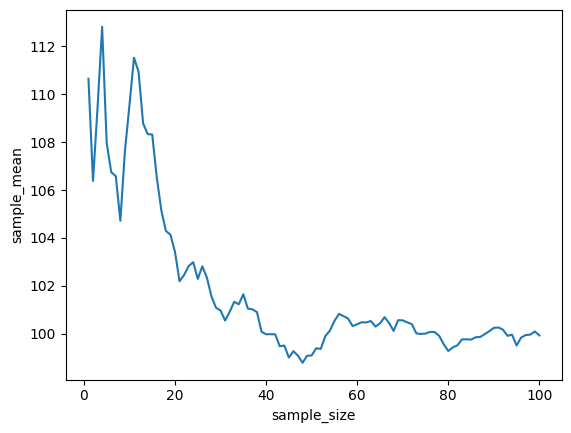

In [9]:
# Graficamos el tamaño de la muestra frente a la media
sns.lineplot(x='sample_size', y='sample_mean', data=data_mean);

Como podemos ver, las medias de la muestra convergen en el valor de CI de la media de la población de 100. Al comienzo de la secuencia, son más erráticas, pero se estabilizan y convergen en el valor correcto a medida que aumenta el tamaño de la muestra.

**Ejemplo de lanzamiento de moneda**

Ahora, echemos un vistazo a los lanzamientos de monedas. Este es un ensayo de Bernoulli porque hay solo dos resultados posibles, cara o cruz. Los datos son binarios y siguen la distribución binomial definida por una proporción de eventos. Para este escenario, definiremos un evento como cara en el lanzamiento de una moneda. Cada lanzamiento de moneda es un intento. La ley de los grandes números predice que a medida que aumenta el número de intentos, la proporción convergerá en el valor esperado de 0,50.

In [10]:
# Hacemos el experimentos reproducible
np.random.seed(1)

# Realizamos los experimentos aumentando cada vez el número de
# intentos de lanzamientos de monedas y guardamos el resultados
coin_dict = {}
for i in range(1, 201):
    coin_dict[i] = np.random.binomial(n=i, p=0.5)

In [11]:
# Guardamos los datos en un DataFrame
data_coin = pd.DataFrame(list(coin_dict.items()), columns=['num_coin_toses', 'heads'])

# Calculamos la proporción de caras
data_coin['heads_proportion'] = data_coin['heads'] / data_coin['num_coin_toses']
data_coin

,num_coin_toses,heads,heads_proportion
0,1,0,0.000000
1,2,1,0.500000
2,3,0,0.000000
3,4,1,0.250000
4,5,1,0.200000
...,...,...,...
195,196,90,0.459184
196,197,99,0.502538
197,198,106,0.535354
198,199,109,0.547739


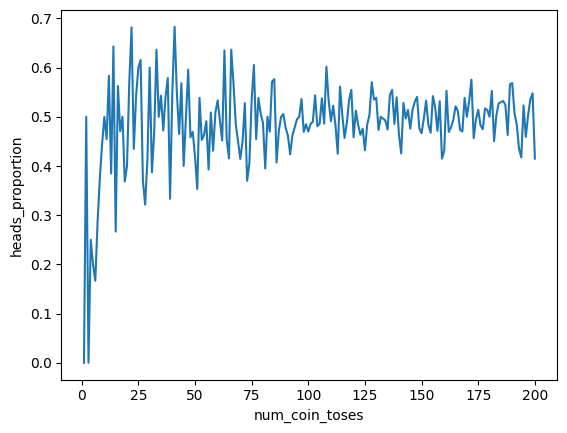

In [12]:
# Graficamos el nº de intentos frente al nº de caras obtenido
sns.lineplot(x='num_coin_toses', y='heads_proportion', data=data_coin);

Como vemos, la proporción de la muestra se vuelve más estable y converge en el valor de probabilidad esperado de 0,50 a medida que aumenta el tamaño de la muestra.

<br>

La ley de los grandes números es esencial tanto para la estadística como para la teoría de la probabilidad.

En el caso de la estadística, ambas leyes de los grandes números indican que las muestras más grandes producen estimaciones que se aproximan sistemáticamente al valor de la población. Estas propiedades se vuelven importantes en la estadística inferencial, donde usamos muestras para estimar las propiedades de las poblaciones. Por eso los estadísticos suelen decir que los tamaños de muestra grandes son mejores.

En la teoría de la probabilidad, a medida que aumenta el número de intentos, la frecuencia relativa de los eventos observados convergerá en el valor de probabilidad esperado. Si lanzamos una moneda al aire cuatro veces no es de extrañar que obtengamos tres caras (75%). Sin embargo, después de 100 lanzamientos de monedas, el porcentaje será extremadamente cercano al 50%.

Estas leyes traen un tipo de orden a los eventos aleatorios. Por ejemplo, si estamos hablando de lanzar monedas, tirar dados o juegos de azar, es más probable que observemos una secuencia inusual de eventos a corto plazo. Sin embargo, a medida que aumenta el número de ensayos, los resultados generales convergen en la probabilidad esperada.

En consecuencia, los casinos con un gran volumen de tráfico pueden predecir sus ganancias para los juegos de azar. Sus ganancias convergerán en un porcentaje predecible en una gran cantidad de juegos. Puede que le ganes a la casa con varias manos afortunadas, pero a la larga, la casa siempre gana.

Hay situaciones específicas en las que las leyes de los grandes números pueden no converger en el valor esperado a medida que aumenta el tamaño de la muestra o el número de ensayos. Cuando los datos siguen la distribución de Cauchy, los números no pueden converger en un valor esperado porque la distribución de Cauchy no tiene un valor esperado. De manera similar, las leyes no se aplican a la distribución de Pareto porque su valor esperado es infinito.

# Fuentes

- [_Law of Large Numbers_ - Statistics By Jim](https://statisticsbyjim.com/basics/law-of-large-numbers/)